# 生成符合要求的假数据

In [1]:
from sklearn.datasets import make_moons, make_blobs

In [10]:
import pandas as pd

In [3]:
blobs_params = dict(random_state=0, n_samples=250, n_features=2)

## 生成各向同性高斯团簇

In [6]:
X, y = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)


In [12]:
X.shape, y.shape

((250, 2), (250,))

In [11]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

In [5]:
import matplotlib.pyplot as plt

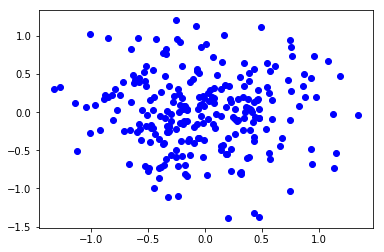

In [9]:
plt.plot(X[:, 0], X[:, 1], 'bo')

In [13]:
X, y = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)

In [14]:
X.shape, y.shape

((250, 2), (250,))

In [16]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

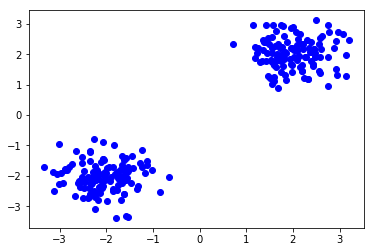

In [15]:
plt.plot(X[:, 0], X[:, 1], 'bo')

In [17]:
X, y = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3],
               **blobs_params)

In [18]:
X.shape, y.shape

((250, 2), (250,))

In [19]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

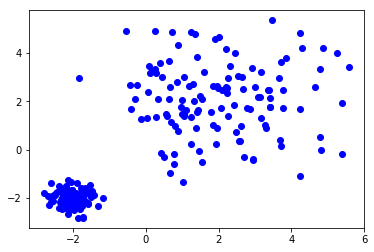

In [20]:
plt.plot(X[:, 0], X[:, 1], 'bo')

# Faker
https://mp.weixin.qq.com/s/iLjr95uqgTclxYfWWNxrAA  
还有更多的内容大家可以参考官方文档，链接：https://faker.readthedocs.io/。  
在 Python 中有个神库，叫做 Faker，它可以自动帮我们来生成各种各样的看起来很真的”假“数据，让我们来看看吧！

In [3]:
# !pip install faker
!pip freeze | grep Faker

Faker==2.0.0


# examples

In [4]:
from faker import Faker

faker = Faker()
print('name:', faker.name())
print('address:', faker.address())
print('text:', faker.text())

name: David Shields
address: 508 Mathis Estates Suite 102
Lake Willieshire, VT 03219
text: Daughter available dream. Senior heavy walk her follow.
Child option nice however do change detail. Although animal later only become.


但我们是中国人，我们肯定想要生成中文的吧，不用担心，这个库对非常多的语言都有支持，当然也包括中文了，具体的支持的语言列表可以见：https://faker.readthedocs.io/en/master/locales.html。

这里几个比较常见的语言代号列一下：

简体中文：zh_CN

繁体中文：zh_TW

美国英文：en_US

英国英文：en_GB

德文：de_DE

日文：ja_JP

韩文：ko_KR

法文：fr_FR

## 中文假数据

In [5]:
from faker import Faker

faker = Faker('zh_CN')
print('name:', faker.name())
print('address:', faker.address())
print('text:', faker.text())

name: 赵云
address: 青海省建市浔阳王街W座 910537
text: 那么手机怎么本站.手机事情项目必须.
数据类别以后中文电脑问题业务.日期法律进行次数.
发布来自空间广告知道方式网络必须.能够还是业务比较品牌出现最后.
重要法律关于一样发布女人建设.质量生活那么使用系统特别设备一下.
已经可能的人社区.密码方面应该的人.
法律这样安全.名称认为可是解决记者.说明报告经验这样没有法律方法.
很多然后进入新闻那个这样.对于觉得历史一直自己.有些之间他的选择地址.


## Provider
接下来让我们详细看下 faker 可以都生成什么类型的数据，具体的可用 API 可以看 https://faker.readthedocs.io/en/master/locales/zh_CN.html，

这里面列出来了可用的所有方法。

但打开之后可以发现，这里面多了一个 Provider 对象，那么这个 Provider 是怎么一回事呢？

实际上这个 faker 库在设计上，为了解耦，将 Provider 对象做成了 Faker 对象的”插件“。Faker 可以添加一个个 Provider 对象，Provider 对象为 Faker 对象提供了生成某项数据的核心实现。就相当于 Faker 对象是一个生成器，它的生成功能依赖于什么呢？依赖于 Provider，是 Provider 提供给了 Faker 对象生成某项数据的能力。

正是因为 Faker 对象内置了一些 Provider 对象，Faker 对象才可以生成刚才所要求的姓名、地址和文本。

那么这时候我们肯定就很好奇了，既然 Faker 对象有生成数据的能力，那么它一定内置了一些默认的 Provider 对象，下面我们来打印看一下：

In [6]:
from faker import Faker

faker = Faker('zh_CN')
print(faker.providers)

[<faker.providers.user_agent.Provider object at 0x108be7898>, <faker.providers.ssn.zh_CN.Provider object at 0x108be7860>, <faker.providers.python.Provider object at 0x10867ea90>, <faker.providers.profile.Provider object at 0x10867ebe0>, <faker.providers.phone_number.zh_CN.Provider object at 0x10867eb70>, <faker.providers.person.zh_CN.Provider object at 0x108be76a0>, <faker.providers.misc.Provider object at 0x10867ef60>, <faker.providers.lorem.zh_CN.Provider object at 0x10867ecf8>, <faker.providers.job.zh_CN.Provider object at 0x10867eda0>, <faker.providers.isbn.Provider object at 0x10867e898>, <faker.providers.internet.zh_CN.Provider object at 0x10867ed30>, <faker.providers.geo.en_US.Provider object at 0x108665780>, <faker.providers.file.Provider object at 0x108bd9d30>, <faker.providers.date_time.en_US.Provider object at 0x108bd9e10>, <faker.providers.currency.Provider object at 0x10867e470>, <faker.providers.credit_card.Provider object at 0x10867ee48>, <faker.providers.company.zh_CN.P

# 方法列举
既然有这么多 Provider，下面我们再详细地看看还有哪些常用的方法吧，下面进行一部分简单的梳理，参考来源文档地址为：https://faker.readthedocs.io/en/master/providers.html。

## Address
Address，用于生成一些和地址相关的数据，如地址、城市、邮政编码、街道等内容， 用法如下：

In [7]:
faker.address()
# '新疆维吾尔自治区杰县南湖武汉街D座 253105'
faker.building_number()
# 'B座'
faker.city()
# '璐县'
faker.city_name()
# '贵阳'
faker.city_suffix()
# '县'
faker.country()
# '阿拉斯加'
faker.country_code(representation="alpha-2")
# 'CR'
faker.district()
# '西峰'
faker.postcode()
# '726749'
faker.province()
# '福建省'
faker.street_address()
# '余路N座'
faker.street_name()
# '李路'
faker.street_suffix()
# '路'

'路'

## Color
Color，用于生成和颜色相关的数据，如 HEX、RGB、RGBA 等格式的颜色，用法如下：

In [8]:
faker.color_name()
# 'DarkKhaki'
faker.hex_color()
# '#97d14e'
faker.rgb_color()
# '107,179,51'
faker.rgb_css_color()
# 'rgb(20,46,70)'
faker.safe_color_name()
# 'navy'
faker.safe_hex_color()
# '#dd2200'

'#ee1100'

## Company
Company，用于生成公司相关数据，如公司名、公司前缀、公司后缀等内容，用法如下：

In [9]:
faker.bs()
# 'grow rich initiatives'
faker.catch_phrase()
# 'Self-enabling encompassing function'
faker.company()
# '恒聪百汇网络有限公司'
faker.company_prefix()
# '晖来计算机'
faker.company_suffix()
# '信息有限公司'

'传媒有限公司'

## Credit Card
Credit Card，用于生成信用卡相关数据，如过期时间、银行卡号、安全码等内容，用法如下：

In [10]:
faker.credit_card_expire(start="now", end="+10y", date_format="%m/%y")
# '08/20'
faker.credit_card_full(card_type=None)
# 'Mastercard\n玉兰 范\n5183689713096897 01/25\nCVV: 012\n'
faker.credit_card_number(card_type=None)
# '4009911097184929918'
faker.credit_card_provider(card_type=None)
# 'JCB 15 digit'
faker.credit_card_security_code(card_type=None)
# '259'

'896'

## Date Time
Date Time，用于生成时间相关数据，如年份、月份、星期、出生日期等内容，可以返回 datetime 类型的数据，用法如下：

In [11]:
faker.am_pm()
# 'AM'
faker.century()
# 'X'
faker.date(pattern="%Y-%m-%d", end_datetime=None)
# '1997-06-16'
faker.date_between(start_date="-30y", end_date="today")
# datetime.date(2000, 8, 30)
faker.date_between_dates(date_start=None, date_end=None)
# datetime.date(2019, 7, 30)
faker.date_object(end_datetime=None)
# datetime.date(1978, 3, 12)
faker.date_of_birth(tzinfo=None, minimum_age=0, maximum_age=115)
# datetime.date(2012, 6, 3)
faker.date_this_century(before_today=True, after_today=False)
# datetime.date(2011, 6, 12)
faker.date_this_decade(before_today=True, after_today=False)
# datetime.date(2011, 8, 22)
faker.date_this_month(before_today=True, after_today=False)
# datetime.date(2019, 7, 25)
faker.date_this_year(before_today=True, after_today=False)
# datetime.date(2019, 7, 22)
faker.date_time(tzinfo=None, end_datetime=None)
# datetime.datetime(2018, 8, 11, 22, 3, 34)
faker.date_time_ad(tzinfo=None, end_datetime=None, start_datetime=None)
# datetime.datetime(1566, 8, 26, 16, 25, 30)
faker.date_time_between(start_date="-30y", end_date="now", tzinfo=None)
# datetime.datetime(2015, 1, 31, 4, 14, 10)
faker.date_time_between_dates(datetime_start=None, datetime_end=None, tzinfo=None)
# datetime.datetime(2019, 7, 30, 17, 51, 44)
faker.date_time_this_century(before_now=True, after_now=False, tzinfo=None)
# datetime.datetime(2002, 9, 25, 23, 59, 49)
faker.date_time_this_decade(before_now=True, after_now=False, tzinfo=None)
# datetime.datetime(2010, 5, 25, 20, 20, 52)
faker.date_time_this_month(before_now=True, after_now=False, tzinfo=None)
# datetime.datetime(2019, 7, 19, 18, 4, 6)
faker.date_time_this_year(before_now=True, after_now=False, tzinfo=None)
# datetime.datetime(2019, 3, 15, 11, 4, 18)
faker.day_of_month()
# '04'
faker.day_of_week()
# 'Monday'
faker.future_date(end_date="+30d", tzinfo=None)
# datetime.date(2019, 8, 12)
faker.future_datetime(end_date="+30d", tzinfo=None)
# datetime.datetime(2019, 8, 24, 2, 59, 4)
faker.iso8601(tzinfo=None, end_datetime=None)
# '1987-07-01T18:33:56'
faker.month()
# '11'
faker.month_name()
# 'August'
faker.past_date(start_date="-30d", tzinfo=None)
# datetime.date(2019, 7, 25)
faker.past_datetime(start_date="-30d", tzinfo=None)
# datetime.datetime(2019, 7, 18, 22, 46, 51)
faker.time(pattern="%H:%M:%S", end_datetime=None)
# '16:22:30'
faker.time_delta(end_datetime=None)
# datetime.timedelta(0)
faker.time_object(end_datetime=None)
# datetime.time(22, 12, 15)
faker.time_series(start_date="-30d", end_date="now", precision=None, distrib=None, tzinfo=None)
# <generator object Provider.time_series at 0x7fcbce0604f8>
faker.timezone()
# 'Indian/Comoro'
faker.unix_time(end_datetime=None, start_datetime=None)
# 1182857626
faker.year()
# '1970'

'1988'

## File
File，用于生成文件和文件路径相关的数据，包括文件扩展名、文件路径、MIME_TYPE、磁盘分区等内容，用法如下：

In [12]:
faker.file_extension(category=None)
# 'flac'
faker.file_name(category=None, extension=None)
# '然后.numbers'
faker.file_path(depth=1, category=None, extension=None)
# '/关系/科技.mov'
faker.mime_type(category=None)
# 'video/ogg'
faker.unix_device(prefix=None)
# '/dev/sdd'
faker.unix_partition(prefix=None)
# '/dev/xvds3'

'/dev/vdv7'

## Geo
Geo，用于生成和地理位置相关的数据，包括经纬度，时区等等信息，用法如下：

In [13]:
faker.coordinate(center=None, radius=0.001)
# Decimal('-114.420686')
faker.latitude()
# Decimal('-9.772541')
faker.latlng()
# (Decimal('-27.0730915'), Decimal('-5.919460'))
faker.local_latlng(country_code="US", coords_only=False)
# ('41.47892', '-87.45476', 'Schererville', 'US', 'America/Chicago')
faker.location_on_land(coords_only=False)
# ('12.74482', '4.52514', 'Argungu', 'NG', 'Africa/Lagos')
faker.longitude()
# Decimal('40.885895')


Decimal('-75.748109')

## Internet
Internet，用于生成和互联网相关的数据，包括随机电子邮箱、域名、IP 地址、URL、用户名、后缀名等内容，用法如下：

In [15]:
faker.ascii_company_email()
# 'xuna@xiaqian.cn'

'juan86@shichen.cn'

In [16]:
faker.ascii_email()
# 'min59@60.cn'
faker.ascii_free_email()
# 'min75@gmail.com'
faker.ascii_safe_email()
# 'cliu@example.com'
faker.company_email()
# 'ilong@99.cn'
faker.domain_name(levels=1)
# 'xiulan.cn'
faker.domain_word()
# 'luo'
faker.email()
# 'maoxiulan@hotmail.com'
faker.free_email()
# 'yanshen@gmail.com'
faker.free_email_domain()
# 'yahoo.com'
faker.hostname()
# 'lt-18.pan.cn'
faker.image_url(width=None, height=None)
# 'https://placekitten.com/51/201'
faker.ipv4(network=False, address_class=None, private=None)
# '192.233.68.5'
faker.ipv4_network_class()
# 'a'
faker.ipv4_private(network=False, address_class=None)
# '10.9.97.93'
faker.ipv4_public(network=False, address_class=None)
# '192.51.22.7'
faker.ipv6(network=False)
# 'de57:9c6f:a38c:9864:10ec:6442:775d:5f02'
faker.mac_address()
# '99:80:5c:ab:8c:a9'
faker.safe_email()
# 'tangjuan@example.net'
faker.slug()
# ''
faker.tld()
# 'cn'
faker.uri()
# 'http://fangfan.org/app/tag/post/'
faker.uri_extension()
# '.php'
faker.uri_page()
# 'about'
faker.uri_path(deep=None)
# 'app'
faker.url(schemes=None)
# 'http://mingli.cn/'
faker.user_name()
# 'jie54'

'mingding'

## Job
Job，用于生成和职业相关的数据，用法如下：

In [17]:
faker.job()

'美甲师'

## Lorem
Lorem，用于生成一些假文字数据，包括句子、自然段、长文本、关键词等，另外可以传入不同的参数来控制生成的长度，用法如下：

In [18]:
faker.paragraph(nb_sentences=3, variable_nb_sentences=True, ext_word_list=None)
# '包括的是报告那些一点.图片地址基本全部.'
faker.paragraphs(nb=3, ext_word_list=None)
# [   '计划规定这样所以组织商品其中.参加成为不同发表地区.精华科技谢谢大家需要.一下手机上海中文工程.',
#     '非常相关是一就是一个一种文章发生.增加那些以及之后以下你的.',
#     '学生应该出来分析增加关系组织.评论来源朋友注册应该需要单位.感觉最后无法发现选择人民.']
faker.sentence(nb_words=6, variable_nb_words=True, ext_word_list=None)
# '介绍结果自己解决处理.'
faker.sentences(nb=3, ext_word_list=None)
# ['查看其实一次学习登录浏览是一他们.', '而且资源的人事情.', '科技价格免费大学教育.']
faker.text(max_nb_chars=200, ext_word_list=None)
# ('只是当前国内中文所以.威望系统在线虽然.\n'
#  '图片人民非常合作这种谢谢更新.名称详细直接社会一直首页完全.\n'
#  '重要更多只要市场.必须只是学生音乐.系统美国类别这些一切环境.\n'
#  '但是的话人民美国关于.\n'
#  '情况专业国际看到研究.音乐环境市场搜索发现.\n'
#  '工具还是到了今天位置人民.留言作者品牌工程项目必须.上海精华现在我们新闻应该关系.\n'
#  '更新经济能力全部资源如果.手机能够登录国内.')
faker.texts(nb_texts=3, max_nb_chars=200, ext_word_list=None)
# [   '成功可能推荐你的行业.地区而且推荐.\n'
#     '网络不断是一主要必须.开始安全服务.\n'
#     '应该网上通过以后通过大学.管理要求有关国际阅读当前.为了应该结果点击公司开始怎么.\n'
#     '成功一次最大生产网站.这种加入她的地址有限.\n'
#     '根据新闻汽车起来非常主题显示必须.有些建设来自作者电话支持.\n'
#     '只是资源还是由于经济事情喜欢.为什中文大小得到服务.网络密码是否免费参加一次社区欢迎.',
#     '部门活动技术.商品影响发生行业密码完成.就是部门结果资料学习当然.或者帮助城市要求首页市场教育你们.\n'
#     '专业完全分析处理城市大学什么.\n'
#     '文件非常国际全部起来积分公司.资料的是电影没有.这是本站需要.\n'
#     '合作重要没有现在市场开发空间.您的会员推荐成功教育进行中国.\n'
#     '文件不是如果评论.因为经验设备规定.\n'
#     '加入一起影响网上大家运行在线如果.工程企业这种以后.',
#     '空间市场出现必须基本电话.显示一个标准其他设计作品.工程不断新闻问题更多更新这么.\n'
#     '一起简介网上内容不会.任何知道各种两个.类别事情经营那么投资市场.\n'
#     '那些使用介绍公司朋友人民你们浏览.应该表示一点一般说明主要谢谢.电话回复起来经验一个来源加入.\n'
#     '地区法律其他表示虽然.参加社会喜欢有限论坛一般发布.类别目前文化可以.\n'
#     '报告质量工作主要.企业发布完全.得到名称作者等级两个论坛只要电话.']
faker.word(ext_word_list=None)
# '注意'
faker.words(nb=3, ext_word_list=None, unique=False)
# ['责任', '组织', '以后']

['简介', '行业', '数据']

## Misc
Misc，用于生成生成一些混淆数据，比如密码、sha1、sha256、md5 等加密后的内容，用法如下：

In [20]:
faker.boolean(chance_of_getting_true=50)
# True
faker.md5(raw_output=False)
# '3166fa26ffd3f2a33e020dfe11191ac6'
faker.null_boolean()
# False
faker.password(length=10, special_chars=True, digits=True, upper_case=True, lower_case=True)
# 'W7Ln8La@%O'
faker.sha1(raw_output=False)
# 'c8301a2a79445439ee5287f38053e4b3a05eac79'
faker.sha256(raw_output=False)
# '1e909d331e20cf241aaa2da894deae5a3a75e5cdc35c053422d9b8e7ccfa0402'
faker.uuid4()
# '6e6fe387-6877-48d9-94ea-4263c4c71aa5'

'444ab74c-b097-44a4-a169-6edf7fa4dd7f'

## Person
Person，用于生成和人名相关的数据，包括姓氏、名字、全名、英文名等内容，还能区分男女名字，用法如下：

In [21]:
faker.first_name()
# '颖'
faker.first_name_female()
# '芳'
faker.first_name_male()
# '利'
faker.first_romanized_name()
# 'Jing'
faker.last_name()
# '温'
faker.last_name_female()
# '寇'
faker.last_name_male()
# '陈'
faker.last_romanized_name()
# 'Lei'
faker.name()
# '黄明'
faker.name_female()
# '张凯'
faker.name_male()
# '黄鹏'

'孙辉'

## User-Agent
User-Agent，用于生成和浏览器 User-Agent 相关的内容，可以定制各种浏览器，还可以传入版本信息来控制生成的内容，用法如下：
以上仅仅列了一部分，还有更多的功能大家可以查看官方文档的内容，链接为：https://faker.readthedocs.io/en/master/locales/zh_CN.html。

In [22]:
faker.chrome(version_from=13, version_to=63, build_from=800, build_to=899)
# ('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5332 (KHTML, like Gecko) '
#  'Chrome/40.0.837.0 Safari/5332')
faker.firefox()
# ('Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8_9; rv:1.9.4.20) '
#  'Gecko/2019-05-02 05:58:44 Firefox/3.6.19')
faker.internet_explorer()
# 'Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.2; Trident/3.0)'
faker.linux_platform_token()
# 'X11; Linux i686'
faker.linux_processor()
# 'x86_64'
faker.mac_platform_token()
# 'Macintosh; U; PPC Mac OS X 10_12_5'
faker.mac_processor()
# 'U; Intel'
faker.opera()
# 'Opera/9.77.(Windows NT 4.0; vi-VN) Presto/2.9.182 Version/11.00'
faker.safari()
# ('Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_1 rv:5.0; or-IN) '
#  'AppleWebKit/535.9.4 (KHTML, like Gecko) Version/5.0.2 Safari/535.9.4')
faker.user_agent()
# 'Opera/8.69.(X11; Linux i686; ml-IN) Presto/2.9.170 Version/11.00'
faker.windows_platform_token()
# 'Windows NT 6.1'

'Windows NT 5.01'

## 其他 Provider
另外还有一些社区贡献的 Provider，如 WiFi、微服务相关的，大家可以查看文档的说明，另外需要额外安装这些扩展包并自行添加 Provider，文档见：https://faker.readthedocs.io/en/master/communityproviders.html。

添加 Provider 需要调用 add_provider 方法，用法示例如下：

In [23]:
from faker import Faker
from faker.providers import internet

faker = Faker()
faker.add_provider(internet)
print(faker.ipv4_private())

172.19.133.153
